# Partial Solution: ARIMA Model

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

stock_prices = pd.read_csv('stock_prices.csv')
stock_prices = stock_prices.set_index('timestamp')
diff_T = pd.read_csv('diff_T.csv')
diff_T = diff_T.set_index('timestamp')

split = int(len(stock_prices['VZ'])*0.95)
train_T = stock_prices['T'].iloc[:split]
test_T = stock_prices['T'].iloc[split:]
train_VZ = stock_prices['VZ'].iloc[:split]
test_VZ = stock_prices['VZ'].iloc[split:]

split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

In [2]:
from statsmodels.tsa.arima_model import ARIMA

First parameter of ARIMA is coming from AR, second parameter is integration term, and the third parameter is the optimal lag of MA model. Given the result we get in the previous part, we can use ARIMA(7, 1, 7).

In [3]:
arima_T = ARIMA(train_T,order=(7,1,7))
arima_fitted_T = arima_T.fit()

In [4]:
arima_predictions_T = arima_fitted_T.predict(start=len(train_T), 
                                   end=len(train_T)+len(test_T)-1,dynamic=False)

In [5]:
arima_predictions_T = pd.DataFrame(arima_predictions_T)
arima_predictions_T.index = diff_test_T.index

In [6]:
arima_predictions_T.to_csv('arima_predictions_T.csv')

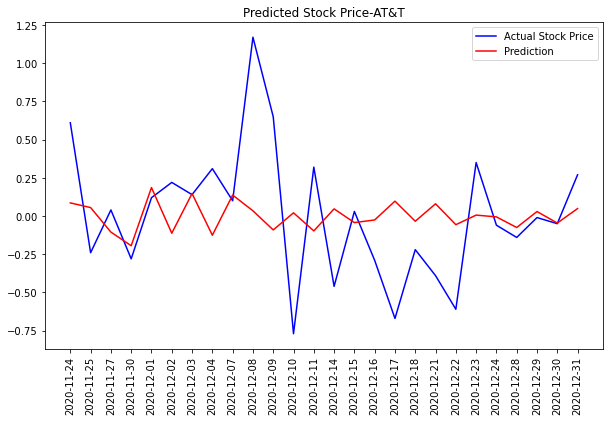

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(diff_test_T, label='Actual Stock Price',c='b')
plt.plot(arima_predictions_T,c='r',label="Prediction")
plt.title('Predicted Stock Price-AT&T')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [10]:
print('RMSE of AT&T for ARIMA model {:.4f}'\
      .format(rmse(diff_test_T,arima_predictions_T)))

RMSE of AT&T for ARIMA model 0.4382
